Project 
------------------
The project will be an application of Python and SQL that we learned in this class, with an emphasis on using Python to get the data, and then using SQL to analyze your data.

An important expectation is that your notebook should be a report that we can replicate. In other words, anyone should be able to execute your report beginning to end, and get all the outcomes of your work.  This means that your notebook should fetch the data, store them in database, analyze the data with SQL queries, and generate the outcomes of the analysis, all within a notebook. In contrast to a PowerPoint, third parties that receive your notebook will be able to see all the steps of your analysis, your assumptions, your models of analysis, etc. 

This is a good practice to cultivate early. It is not easy. But it is tremendously useful. In fact, even when yourself will come back to the analysis a few weeks/months/years later, you will be able to understand exactly what you did in the analysis, and how you came up with the results.

In terms of deliverables, you are expected to do the following:
1. Find a source of data that you find interesting. Here are some examples.
2. Based on the data you collect, create a database that can be used to store your data. You are encouraged to create an ER diagram first and then translate the ER diagram into a set of tables in MySQL.
3. Load the data in the database and run at least 3 "interesting" SQL queries (including queries with joins and group by). 4. Analyze the results of these queries, and explain (potentially with some visualizations) the interesting insights that you learned from this data analysis.
5. Create an iPython notebook with the code, and submit it on NYU Classes. The notebook should also contain enough text, so that someone can understand what you are trying to do with the data.
6. Present your project in class.


Group O: Kathleen Ding, Evelyn Wang, Jiaqi Yu, Shijin Zheng   
------------------
Topic: Analysis on Student Loan Default Rate

Dataset Description   
------------------


College Scorecard is an online tool created by the United States Department of Education to provide reliable data on higher education's college costs, student graduation,student debt, post-college earnings, and more. 

From College Scorecard, we downloaded the most recent data published in September 2017. This dataset provides 1777 attributes of 7593 post-secondary institutions. The institutions in the dataset include schools within the United States and outside of United States. 

### Fetch Data Set Using Curl

In [1]:
!curl 'https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv' -o Most-Recent-Cohorts-All-Data-Elements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  138M  100  138M    0     0  12.0M      0  0:00:11  0:00:11 --:--:-- 13.7M


### Read csv file containing most recent cohort default rates 

In [2]:
import pandas as pd
import numpy as np 

df = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

# Because we are interested only in the institutions within the 50 states of US, we drop institutions from foreign countries.  
# The foreign institutions have the "STABBR" column label as one of the following: AS, FM, GU, MH, MP, PR, PW, VI 
us_inst = (df["STABBR"] != "AS")\
        & (df["STABBR"] != "FM")\
        & (df["STABBR"] != "GU")\
        & (df["STABBR"] != "MH")\
        & (df["STABBR"] != "MP")\
        & (df["STABBR"] != "PR")\
        & (df["STABBR"] != "PW")\
        & (df["STABBR"] != "VI")

df = df[us_inst]



# Because of the data points are labeled as "PrivacySuppressed", we decide to relace all of these data points with NULL for organization.
df.replace("PrivacySuppressed", np.NaN, inplace = True)

df.head()


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,NaN,NaN,NaN,NaN,NaN,11679.0,2.0,242.0,6822.0,SACSCC
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,279.0,1.0,NaN,319.0,SACSCC
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,5618.0,2.0,184.0,1853.0,SACSCC
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,NaN,NaN,NaN,NaN,4805.0,2.0,24.0,619.0,SACSCC


In [4]:
# Check values were replaced correctly
check_col_list = ["COUNT_WNE_INDEP0_INC1_P6", "COUNT_WNE_INDEP0_P6"]
df[check_col_list].head()


,COUNT_WNE_INDEP0_INC1_P6,COUNT_WNE_INDEP0_P6
0,442,1038
1,496,1684
2,NaN,NaN
3,187,814
4,613,1352


In [5]:
# Convert to appropriate data types 

# institution
df["CURROPER"] = pd.Categorical(df["CURROPER"], ordered=False)
df["HIGHDEG"] = pd.Categorical(df["HIGHDEG"], ordered=False)
df["ICLEVEL"] = pd.Categorical(df["ICLEVEL"], ordered=False)
df["CONTROL"] = pd.Categorical(df["CONTROL"], ordered=False)

# studentbody
df["INC_PCT_LO"] = pd.to_numeric(df["INC_PCT_LO"], errors='coerce')
df["INC_PCT_M1"] = pd.to_numeric(df["INC_PCT_M1"], errors='coerce')
df["INC_PCT_M2"] = pd.to_numeric(df["INC_PCT_M2"], errors='coerce')
df["INC_PCT_H1"] = pd.to_numeric(df["INC_PCT_H1"], errors='coerce')
df["INC_PCT_H2"] = pd.to_numeric(df["INC_PCT_H2"], errors='coerce')

# financialaid
df["DEBT_MDN"] = pd.to_numeric(df["DEBT_MDN"], errors='coerce')
df["GRAD_DEBT_MDN"] = pd.to_numeric(df["GRAD_DEBT_MDN"], errors='coerce')
df["WDRAW_DEBT_MDN"] = pd.to_numeric(df["WDRAW_DEBT_MDN"], errors='coerce')
df["LO_INC_DEBT_MDN"] = pd.to_numeric(df["LO_INC_DEBT_MDN"], errors='coerce')
df["MD_INC_DEBT_MDN"] = pd.to_numeric(df["MD_INC_DEBT_MDN"], errors='coerce')
df["HI_INC_DEBT_MDN"] = pd.to_numeric(df["HI_INC_DEBT_MDN"], errors='coerce')

# repayment
df["RPY_3YR_RT"] = pd.to_numeric(df["RPY_3YR_RT"], errors='coerce')
df["FEMALE_RPY_3YR_RT"] = pd.to_numeric(df["FEMALE_RPY_3YR_RT"], errors='coerce')
df["MALE_RPY_3YR_RT"] = pd.to_numeric(df["MALE_RPY_3YR_RT"], errors='coerce')
df["LO_INC_RPY_3YR_RT"] = pd.to_numeric(df["LO_INC_RPY_3YR_RT"], errors='coerce')
df["MD_INC_RPY_3YR_RT"] = pd.to_numeric(df["MD_INC_RPY_3YR_RT"], errors='coerce')
df["HI_INC_RPY_3YR_RT"] = pd.to_numeric(df["HI_INC_RPY_3YR_RT"], errors='coerce')

# earning
df["MD_EARN_WNE_P10"] = pd.to_numeric(df["MD_EARN_WNE_P10"], errors='coerce')
df["MN_EARN_WNE_INC1_P10"] = pd.to_numeric(df["MN_EARN_WNE_INC1_P10"], errors='coerce')
df["MN_EARN_WNE_INC2_P10"] = pd.to_numeric(df["MN_EARN_WNE_INC2_P10"], errors='coerce')
df["MN_EARN_WNE_INC3_P10"] = pd.to_numeric(df["MN_EARN_WNE_INC3_P10"], errors='coerce')
df["GT_25K_P10"] = pd.to_numeric(df["GT_25K_P10"], errors='coerce')


### Institution dataframe

In [6]:
# Create dataframe for institution table 

inst_col_list = ["UNITID","CURROPER", "INSTNM", "STABBR", "HIGHDEG", "ICLEVEL", "CONTROL", "TUITFTE"]

institution = df[inst_col_list]

institution.dtypes


UNITID         int64
CURROPER    category
INSTNM        object
STABBR        object
HIGHDEG     category
ICLEVEL     category
CONTROL     category
TUITFTE      float64
dtype: object

In [7]:
institution.head()

,UNITID,CURROPER,INSTNM,STABBR,HIGHDEG,ICLEVEL,CONTROL,TUITFTE
0,100654,1,Alabama A & M University,AL,4,1,1,9657.0
1,100663,1,University of Alabama at Birmingham,AL,4,1,1,10263.0
2,100690,1,Amridge University,AL,4,1,2,17071.0
3,100706,1,University of Alabama in Huntsville,AL,4,1,1,8917.0
4,100724,1,Alabama State University,AL,4,1,1,7717.0


### Admission dataframe

In [8]:
# Creating dataframe for admission table 

ad_col_list = ["UNITID","ADM_RATE"]
admission = df[ad_col_list]
admission.dtypes


UNITID        int64
ADM_RATE    float64
dtype: object

In [9]:
admission.head()

,UNITID,ADM_RATE
0,100654,0.6538
1,100663,0.6043
2,100690,NaN
3,100706,0.8120
4,100724,0.4639


### Cost dataframe

In [10]:
# Creating dataframe for cost table 

cost_col_list = ["UNITID","COSTT4_A", "COSTT4_P"]

cost = df[cost_col_list]
cost.dtypes

UNITID        int64
COSTT4_A    float64
COSTT4_P    float64
dtype: object

In [11]:
cost.head()

,UNITID,COSTT4_A,COSTT4_P
0,100654,20809.0,NaN
1,100663,22232.0,NaN
2,100690,12133.0,NaN
3,100706,20999.0,NaN
4,100724,18100.0,NaN


### Studentbody dataframe

In [12]:
# Creating dataframe for studentbody table 

stu_col_list = ["UNITID","NUM4_PUB","NUM4_PRIV","UGDS","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN",\
                "UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","UGDS_WHITENH","UGDS_BLACKNH","UGDS_API","INC_PCT_LO", \
                "INC_PCT_M1","INC_PCT_M2","INC_PCT_H1","INC_PCT_H2"]

studentbody = df[stu_col_list]
studentbody.dtypes

UNITID            int64
NUM4_PUB        float64
NUM4_PRIV       float64
UGDS            float64
UGDS_WHITE      float64
UGDS_BLACK      float64
UGDS_HISP       float64
UGDS_ASIAN      float64
UGDS_AIAN       float64
UGDS_NHPI       float64
UGDS_2MOR       float64
UGDS_NRA        float64
UGDS_UNKN       float64
UGDS_WHITENH    float64
UGDS_BLACKNH    float64
UGDS_API        float64
INC_PCT_LO      float64
INC_PCT_M1      float64
INC_PCT_M2      float64
INC_PCT_H1      float64
INC_PCT_H2      float64
dtype: object

In [13]:
studentbody.head()

,UNITID,NUM4_PUB,NUM4_PRIV,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,...,UGDS_NRA,UGDS_UNKN,UGDS_WHITENH,UGDS_BLACKNH,UGDS_API,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2
0,100654,743.0,NaN,4505.0,0.0340,0.9216,0.0058,0.0018,0.0022,0.0018,...,0.0062,0.0266,0.0272,0.9543,0.0025,0.632596,0.172111,0.099403,0.057956,0.037935
1,100663,955.0,NaN,11269.0,0.5863,0.2541,0.0317,0.0595,0.0023,0.0006,...,0.0181,0.0085,0.6070,0.2624,0.0419,0.450312,0.166499,0.137069,0.125176,0.120943
2,100690,NaN,9.0,308.0,0.2110,0.3409,0.0195,0.0000,0.0000,0.0032,...,0.0000,0.4253,0.4602,0.3830,0.0129,0.791209,0.131868,0.036630,NaN,NaN
3,100706,331.0,NaN,5829.0,0.7024,0.1230,0.0417,0.0381,0.0130,0.0000,...,0.0317,0.0300,0.7262,0.1469,0.0290,0.412144,0.149494,0.138454,0.137534,0.162374
4,100724,570.0,NaN,4740.0,0.0165,0.9251,0.0116,0.0032,0.0008,0.0006,...,0.0209,0.0099,0.0000,0.0000,0.0000,0.641623,0.164725,0.104861,0.049016,0.039775


### Financialaid dataframe

In [14]:
# Create dataframe for financialaid table 

fa_col_list = ["UNITID","PCTFLOAN","DEBT_MDN","GRAD_DEBT_MDN","WDRAW_DEBT_MDN","LO_INC_DEBT_MDN", "MD_INC_DEBT_MDN","HI_INC_DEBT_MDN"]

financialaid = df[fa_col_list]

financialaid.dtypes

UNITID               int64
PCTFLOAN           float64
DEBT_MDN           float64
GRAD_DEBT_MDN      float64
WDRAW_DEBT_MDN     float64
LO_INC_DEBT_MDN    float64
MD_INC_DEBT_MDN    float64
HI_INC_DEBT_MDN    float64
dtype: object

In [15]:
financialaid.head()

,UNITID,PCTFLOAN,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN
0,100654,0.8159,14600.0,35000.0,9500.0,14457.0,15000.0,14250.0
1,100663,0.5218,14250.0,21500.0,9500.0,14739.0,14250.0,14000.0
2,100690,0.8781,11082.0,23000.0,9500.0,9500.0,15750.0,18469.0
3,100706,0.4589,15000.0,23500.0,9377.0,16750.0,16083.0,12500.0
4,100724,0.7692,15274.0,32091.0,11500.0,15338.0,15757.0,15000.0


### Completion dataframe

In [16]:
# Create dataframe for completion table 

comp_col_list = ["UNITID","C150_4_POOLED","C150_L4_POOLED"]

completion = df[comp_col_list]

completion.dtypes

UNITID              int64
C150_4_POOLED     float64
C150_L4_POOLED    float64
dtype: object

In [17]:
completion.head()

,UNITID,C150_4_POOLED,C150_L4_POOLED
0,100654,0.3303,NaN
1,100663,0.5504,NaN
2,100690,0.3333,NaN
3,100706,0.4776,NaN
4,100724,0.2663,NaN


### Repayment dataframe 

In [18]:
# Create dataframe for repayment table 

repayment_col_list = ["UNITID","CDR3", "RPY_3YR_RT","FEMALE_RPY_3YR_RT","MALE_RPY_3YR_RT","LO_INC_RPY_3YR_RT",\
                      "MD_INC_RPY_3YR_RT","HI_INC_RPY_3YR_RT"]

repayment = df[repayment_col_list]

repayment.dtypes

UNITID                 int64
CDR3                 float64
RPY_3YR_RT           float64
FEMALE_RPY_3YR_RT    float64
MALE_RPY_3YR_RT      float64
LO_INC_RPY_3YR_RT    float64
MD_INC_RPY_3YR_RT    float64
HI_INC_RPY_3YR_RT    float64
dtype: object

In [19]:
repayment.head()

,UNITID,CDR3,RPY_3YR_RT,FEMALE_RPY_3YR_RT,MALE_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT
0,100654,0.165,0.245850,0.245722,0.245985,0.224608,0.272152,0.295597
1,100663,0.053,0.519911,0.508016,0.541336,0.467108,0.526861,0.615655
2,100690,0.100,0.233100,0.189591,0.306250,0.163823,NaN,NaN
3,100706,0.052,0.549003,0.511628,0.594189,0.453358,0.594326,0.670690
4,100724,0.167,0.196354,0.212460,0.175749,0.173225,0.240811,0.283105


### Earning Dataframe

In [20]:
# Create dataframe for earning table 

earning_col_list = ["UNITID","MD_EARN_WNE_P10","MN_EARN_WNE_INC1_P10","MN_EARN_WNE_INC2_P10","MN_EARN_WNE_INC3_P10","GT_25K_P10"]

earning = df[earning_col_list]

earning.dtypes

UNITID                    int64
MD_EARN_WNE_P10         float64
MN_EARN_WNE_INC1_P10    float64
MN_EARN_WNE_INC2_P10    float64
MN_EARN_WNE_INC3_P10    float64
GT_25K_P10              float64
dtype: object

In [21]:
earning.head()

,UNITID,MD_EARN_WNE_P10,MN_EARN_WNE_INC1_P10,MN_EARN_WNE_INC2_P10,MN_EARN_WNE_INC3_P10,GT_25K_P10
0,100654,29900.0,33000.0,35500.0,36100.0,0.599
1,100663,40200.0,45600.0,45900.0,48600.0,0.747
2,100690,40100.0,NaN,46400.0,NaN,0.696
3,100706,45600.0,47000.0,53400.0,52100.0,0.779
4,100724,26700.0,28400.0,30700.0,32400.0,0.528


### Inserting Data in a Database using Pandas

In [53]:
from sqlalchemy import create_engine

# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='root', password='dwdstudent2015', 
    host = 'localhost', port=3306)
engine = create_engine(conn_string)

In [54]:
# Create the database where we want to store the data
# Do not worry about the Warning if the database already exists
engine.execute('CREATE DATABASE IF NOT EXISTS college_scorecard')
engine.execute('USE college_scorecard')

/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:470: Warning: (1007, "Can't create database 'college_scorecard'; database exists")
  cursor.execute(statement, parameters)


### Store admission dataframe 

In [55]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS admission')
# Store the institution dataframe as a SQL table, using the to_sql command
admission.to_sql(name='admission',  
                 con = engine, 
                 if_exists='replace', 
                 index=False, 
                 chunksize=1000) 

### Store cost dataframe 

In [56]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS cost')
# Store the institution dataframe as a SQL table, using the to_sql command
cost.to_sql(name='cost',  
            con = engine, 
            if_exists='replace', 
            index=False, 
            chunksize=1000) 

### Store studentbody dataframe 

In [57]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS studentbody')
# Store the institution dataframe as a SQL table, using the to_sql command
studentbody.to_sql(name='studentbody',  
            con = engine, 
            if_exists='replace', 
            index=False, 
            chunksize=1000) 

### Store financialaid dataframe

In [58]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS financialaid')
# Store the institution dataframe as a SQL table, using the to_sql command
financialaid.to_sql(name='financialaid',  
            con = engine, 
            if_exists='replace', 
            index=False,
            chunksize=1000) 

### Store completion dataframe

In [59]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS completion')
# Store the institution dataframe as a SQL table, using the to_sql command
completion.to_sql(name='completion',  
            con = engine, 
            if_exists='replace', 
            index=False, 
            chunksize=1000) 

### Store repayment dataframe

In [60]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS repayment')
# Store the institution dataframe as a SQL table, using the to_sql command
repayment.to_sql(name='repayment',  
            con = engine, 
            if_exists='replace', 
            index=False, 
            chunksize=1000) 

### Store earning dataframe

In [61]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS earning')
# Store the institution dataframe as a SQL table, using the to_sql command
earning.to_sql(name='earning',  
            con = engine, 
            if_exists='replace', 
            index=False, 
            chunksize=1000) 

### Store institution dataframe

In [62]:
# Drop table if it's already there 

engine.execute('DROP TABLE IF EXISTS institution')
# Store the institution dataframe as a SQL table, using the to_sql command
institution.to_sql(name='institution',  
                   con = engine, 
                   if_exists='replace', 
                   index=False,
                   chunksize=1000) 

### Declare primary and foreign keys

In [63]:
# institution
engine.execute('ALTER TABLE `institution` ADD PRIMARY KEY(`UNITID`);')


In [64]:
# admission
engine.execute('ALTER TABLE `admission` ADD CONSTRAINT `UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')


In [65]:
# cost
engine.execute('ALTER TABLE `cost` ADD CONSTRAINT `c_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

In [66]:
# studentbody
engine.execute('ALTER TABLE `studentbody` ADD CONSTRAINT `s_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

In [67]:
# financialaid
engine.execute('ALTER TABLE `financialaid` ADD CONSTRAINT `f_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

In [68]:
# completion
engine.execute('ALTER TABLE `completion` ADD CONSTRAINT `comp_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

In [69]:
# repayment
engine.execute('ALTER TABLE `repayment`ADD CONSTRAINT `r_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

In [70]:
# earning
engine.execute('ALTER TABLE `earning` ADD CONSTRAINT `e_UNITID` FOREIGN KEY (`UNITID`) REFERENCES institution(`UNITID`);')

Query 1: Find the the mean 3yr cohort default rate for each type of institutions
------------------
Variable Explanation

    -UNITID: the unique identification number assigned to postsecondary institutions. 
    -CONTROL: identifies whether the institution’s governance structure is public, private nonprofit, or private for-profit.
            1: Public
            2: Private nonprofit 
            3: Private for-profit 
     -CDR3: three-year cohort default rate measures the share of borrowers who have defaulted on their loans within three years of entering repayment. For federal student loans, you will default if you haven't made a payment on your federal student loan for 270 days (nine months).The CDR3 of FY 2015 rates were calculated using the cohort of borrowers who entered repayment on their federal student loans between October 1, 2014 and September 30, 2015, and who defaulted before September 30, 2017. 

In [71]:
conn_string_college_scorecard = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='root', 
    password='dwdstudent2015', 
    host = 'localhost', 
    port=3306, 
    db='college_scorecard'
)
engine_college_scorecard = create_engine(conn_string_college_scorecard)

In [72]:
mean_cdr = '''
SELECT I.CONTROL AS `Institution Type`, AVG(R.CDR3) AS `Average 3yr Cohort Default Rate`
FROM institution I 
INNER JOIN repayment R ON I.UNITID=R.UNITID
GROUP BY `Institution Type`
ORDER BY `Average 3yr Cohort Default Rate` DESC
'''

In [73]:
df_mean_cdr = pd.read_sql(mean_cdr, con=engine_college_scorecard)
df_mean_cdr

,Institution Type,Average 3yr Cohort Default Rate
0,3,0.139517
1,1,0.131620
2,2,0.068896


In [75]:
# Create pivot table 
dfp_mean_cdr = df_mean_cdr.pivot_table(index='Institution Type', values= 'Average 3yr Cohort Default Rate')

# Rename index names
dfp_mean_cdr.rename(index = {'1': 'Public', '2':'Private nonprofit', '3':'Private for-profit' }, inplace = True)
dfp_mean_cdr

,Average 3yr Cohort Default Rate
Institution Type,
Public,0.131620
Private nonprofit,0.068896
Private for-profit,0.139517


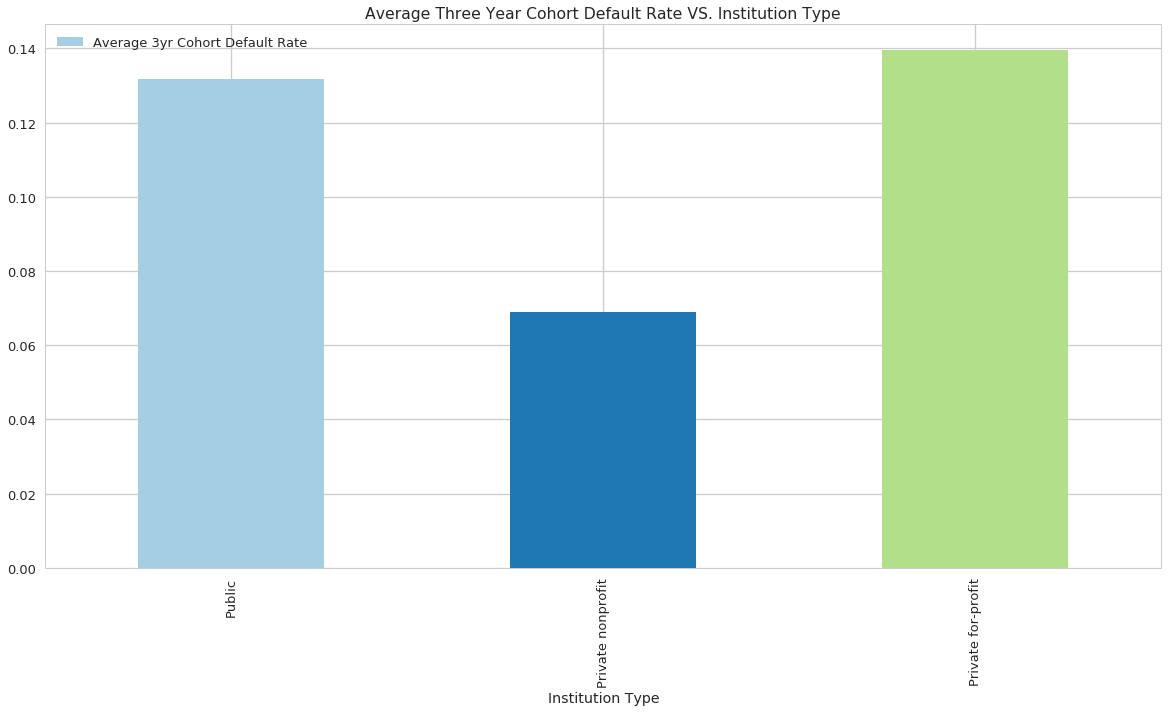

In [76]:
# Render our plots inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

dfp_mean_cdr.plot(kind = 'bar',
             figsize = (20,10),
             color=[plt.cm.Paired(np.arange(len(df)))]
            )

plt.title('Average Three Year Cohort Default Rate VS. Institution Type')

Result Analysis:
------------------
Based on the result, private for-profit institutions have the highest risk of default on student loans with the average 3yr cohort default rate equal to 13.9517%. The average 3yr cohort default rate of Public institutions is very close to that privte for-profit institutions with 13.162%. The private nonprofit institutions have the lowest risk of student default with average 3yr cohort default rate equal to 6.8896%. 

This result aligns with past researches on student loan default rate that students from for-profit institutions have a greater risk of defaulting on their loans because many for-profit institutions are non-selective, and students of for-profit colleges are likely to be older, less likely to complete their degrees, have a higher risk of living in poverty, and have difficulty finding jobs after school. Since students enrolled in non-selective for-profit institutions are associated with these disadvantages, it is expected that students in these institutions have greater need to take out loans to pay for their education and lower post-graduation earnings. 

While for-profit and public institutions had similar default rates, larger enrollment at public institutions means that there were more students who had defaulted at public institutions within three years of leaving than any other category.

Compare to their peers in for-profit schools, the majority of students in private non-profit institutions come from relatively wealthier background, which decreases their chance of default. Furthermore, students who hold a degree from selective private non-profit institutions tend to experience better labor market outcomes after leaving school, and earn higher salaries to pay back their loans. These advantages reduce the chance of students from private non-profit institutions to go into default. 

### Query 2: Calculate the mean cohort default rate for the schools in every state. See which state has the highest and lowest default rate.

In [77]:
import requests
import json
import geopandas as gpd
import ast

In [78]:
# Download locally the GeoJSON files from http://eric.clst.org/Stuff/USGeoJSON

!curl 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_500k.json' -o 'data/us_states_high_detail.json'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2432k  100 2432k    0     0  2246k      0  0:00:01  0:00:01 --:--:-- 2248k


In [79]:
geojson=open('data/us_states_high_detail.json', 'r').read()
states_geojson = json.loads(geojson)["features"]
df_states = gpd.GeoDataFrame.from_features(states_geojson)
df_states = df_states[ df_states.STATE!='02' ] #drop Alaska
df_states = df_states[ df_states.STATE!='15' ] #drop Hawaii
df_states = df_states[ df_states.STATE!='72' ] #drop Puerto Rico
df_states.set_index('NAME',inplace=True)
df_states.sort_index(inplace=True)

In [80]:
df_states.head()

,CENSUSAREA,GEO_ID,LSAD,STATE,geometry
NAME,,,,,
Alabama,50645.326,0400000US01,,01,"(POLYGON ((-85.002368 31.000682, -85.024108 31..."
Arizona,113594.084,0400000US04,,04,"POLYGON ((-109.045223 36.999084, -109.045244 3..."
Arkansas,52035.477,0400000US05,,05,"POLYGON ((-94.55929 36.499496, -94.51947800000..."
California,155779.220,0400000US06,,06,"(POLYGON ((-122.446316 37.861046, -122.438565 ..."
Colorado,103641.888,0400000US08,,08,"POLYGON ((-102.04224 36.993083, -102.054503 36..."


In [81]:
# Dropped Alaska and Hawaii

state_cdr='''
SELECT STABBR AS State, AVG(R.CDR3) AS `Average Cohort Default Rate`
FROM repayment R
INNER JOIN institution I on R.UNITID=I.UNITID
WHERE STABBR != 'AK' AND STABBR != 'HI' 
GROUP BY State
ORDER BY `Average Cohort Default Rate` DESC
'''

In [82]:
df_state_cdr=pd.read_sql(state_cdr,con=engine_college_scorecard)
df_state_cdr

,State,Average Cohort Default Rate
0,NM,0.160213
1,MS,0.153315
2,KY,0.151473
3,NC,0.150473
4,TX,0.149512
5,OK,0.148535
6,WV,0.146618
7,NV,0.145905
8,WY,0.144545
9,AR,0.141630


In [83]:
df_state_cdr.dtypes

State                           object
Average Cohort Default Rate    float64
dtype: object

In [84]:
df_state_cdr.set_index('State', inplace = True)

df_state_cdr

,Average Cohort Default Rate
State,
NM,0.160213
MS,0.153315
KY,0.151473
NC,0.150473
TX,0.149512
OK,0.148535
WV,0.146618
NV,0.145905
WY,0.144545


In [85]:
# Rename index values to match that of json file

df_state_cdr.rename(index = {'AL': 'Alabama','AZ': 'Arizona', 'AR':'Arkansas','CA':'California',\
                            'CO': 'Colorado','CT':'Connecticut','DE':'Delaware','FL':'Florida','GA':'Georgia',\
                            'ID':'Idaho','IL': 'Illinois','DC': 'District of Columbia', 'IN':'Indiana',\
                            'IA': 'Iowa','KS':'Kansas','KY':'Kentucky', 'LA':'Louisiana', 'ME':'Maine',\
                            'MD':'Maryland', 'MA':'Massachusetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi',\
                            'MO':'Missouri','MT':'Montana', 'NE':'Nebraska', 'NV':'Nevada','NH':'New Hampshire',\
                            'NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina',\
                            'ND':'North Dakota','OH':'Ohio','OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania',\
                            'RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee',\
                            'TX':'Texas','UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virginia',\
                            'WI':'Wisconsin','WY':'Wyoming'}, inplace = True)
df_state_cdr


,Average Cohort Default Rate
State,
New Mexico,0.160213
Mississippi,0.153315
Kentucky,0.151473
North Carolina,0.150473
Texas,0.149512
Oklahoma,0.148535
West Virginia,0.146618
Nevada,0.145905
Wyoming,0.144545


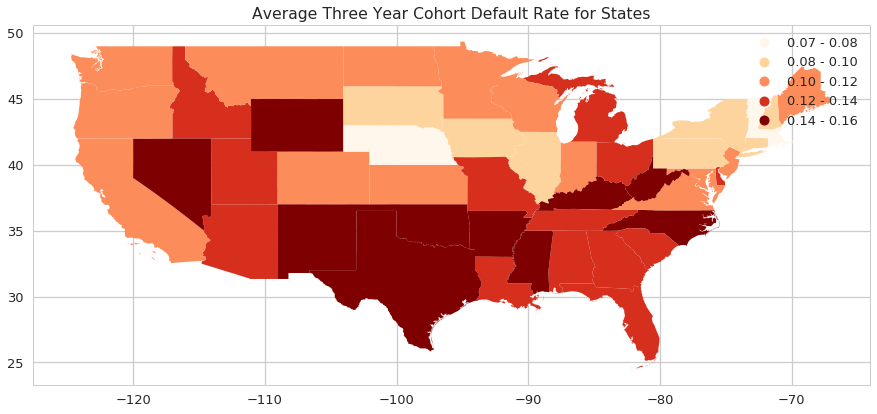

In [86]:
df_states.join(df_state_cdr).plot(figsize=(15,7), column='Average Cohort Default Rate', cmap='OrRd',  linewidth=0.1,\
                                  legend = True,scheme='fisher_jenks')

plt.title('Average Three Year Cohort Default Rate for States')

Result Analysis:
------------------
Based on the result, New Mexico has the highest risk of student loan default with the average CDR3 of all institutions in the state equal to 16.0213%. Rhode Island has the lowest risk of student loan default with only 7.1720% of average CDR3 of all institutions in the state.

The 5 states with highest CDR3 are New Mexico, Mississippi, Kentucky, North Carolina, and Texas. The CDR3 of these 5 states are all above 14% and these 5 states are mostly located in the southern part of United States. The 5 states with lowest CDR3 are Rhode Island, Vermont, Massachusetts, Nebraska, and New Hampshire. The CDR3 of these 5 states are all below 9% and these 5 states are mostly located in the northern part of United States. 

At the state-level, students attending institutions in the southwest and southeast tended to default at higher rates than borrowers attending institutions in the midwest or northeast. 

### Query 3: Calculate the average median debt of each family income category for each institutional type

In [87]:
avgmdn_debt='''
SELECT I.CONTROL AS `Institution Type`,
ROUND(AVG(F.LO_INC_DEBT_MDN),2) AS 'Average Median Debt (< 30,000)',
ROUND(AVG(F.MD_INC_DEBT_MDN),2) AS 'Average Median Debt (30,000--75,001)',
ROUND(AVG(F.HI_INC_DEBT_MDN),2) AS 'Average Median Debt (> 75,001)'
FROM institution I 
INNER JOIN financialaid F ON F.UNITID=I.UNITID
GROUP BY I.CONTROL;
'''

In [88]:
df_avgmdn_debt = pd.read_sql(avgmdn_debt, con=engine_college_scorecard)
df_avgmdn_debt

,Institution Type,"Average Median Debt (< 30,000)","Average Median Debt (30,000--75,001)","Average Median Debt (> 75,001)"
0,1,9763.75,9994.07,9344.00
1,2,16646.65,17719.18,16259.70
2,3,10064.28,12032.69,11340.14


In [89]:
# Create pivot table 
dfp_avgmdn_debt = df_avgmdn_debt.pivot_table(index=['Institution Type'], values=['Average Median Debt (< 30,000)','Average Median Debt (30,000--75,001)','Average Median Debt (> 75,001)'])
# Change index type 
dfp_avgmdn_debt.rename(index = {'1': 'Public', '2':'Private nonprofit', '3':'Private for-profit' }, inplace = True)
dfp_avgmdn_debt

,"Average Median Debt (30,000--75,001)","Average Median Debt (< 30,000)","Average Median Debt (> 75,001)"
Institution Type,,,
Public,9994.07,9763.75,9344.00
Private nonprofit,17719.18,16646.65,16259.70
Private for-profit,12032.69,10064.28,11340.14


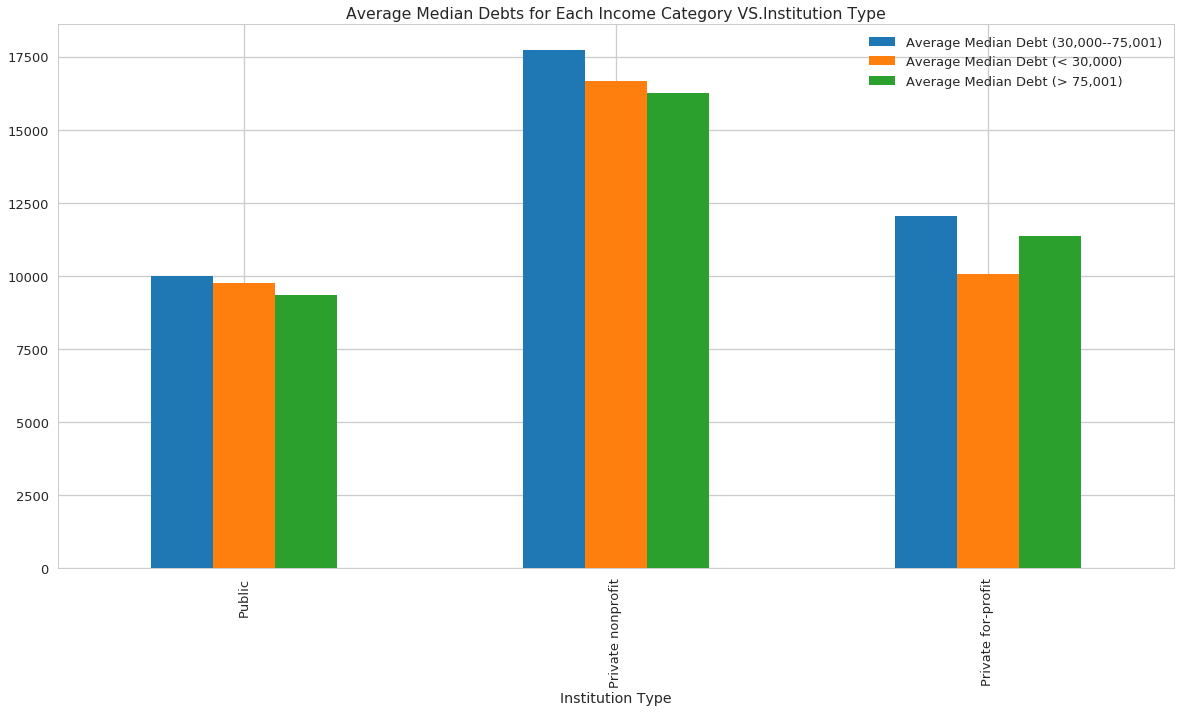

In [90]:
dfp_avgmdn_debt.plot(kind = 'bar',
             figsize = (20,10))

plt.title('Average Median Debts for Each Income Category VS.Institution Type')


Result Analysis:
------------------
From the result, we found that students from public schools have the lowest median debt out of the three school types. Within each school type, students with family income ranging from \$30,000-\$70,001 (shown in blue bars) have the highest median debt out of the three income groups. 

### Query 4: For each institution type, find the maximum, minimum, standard deviation, and average share of students earning over $25,000/year (threshold earnings) 10 years after entry and order by average share

In [91]:
threshold_earning_box='''
SELECT I.CONTROL AS Institution_Type, E.GT_25K_P10 
FROM institution I 
INNER JOIN earning E ON I.UNITID=E.UNITID
ORDER BY Institution_Type
'''

In [92]:
df_threshold_earning_box = pd.read_sql(threshold_earning_box,con=engine_college_scorecard)

df_threshold_earning_box

,Institution_Type,GT_25K_P10
0,1,0.599
1,1,0.747
2,1,0.779
3,1,0.528
4,1,0.786
5,1,0.561
6,1,0.747
7,1,0.657
8,1,0.823
9,1,0.533


In [93]:
# Convert to appropriate data type

df_threshold_earning_box['Institution_Type'] = pd.Categorical(df_threshold_earning_box['Institution_Type'],\
                                                              categories = ['1','2','3'], ordered = False)

df_threshold_earning_box['Institution_Type'].cat.categories = ['Public','Private nonprofit','Private for-profit']

In [94]:
df_threshold_earning_box

,Institution_Type,GT_25K_P10
0,Public,0.599
1,Public,0.747
2,Public,0.779
3,Public,0.528
4,Public,0.786
5,Public,0.561
6,Public,0.747
7,Public,0.657
8,Public,0.823
9,Public,0.533


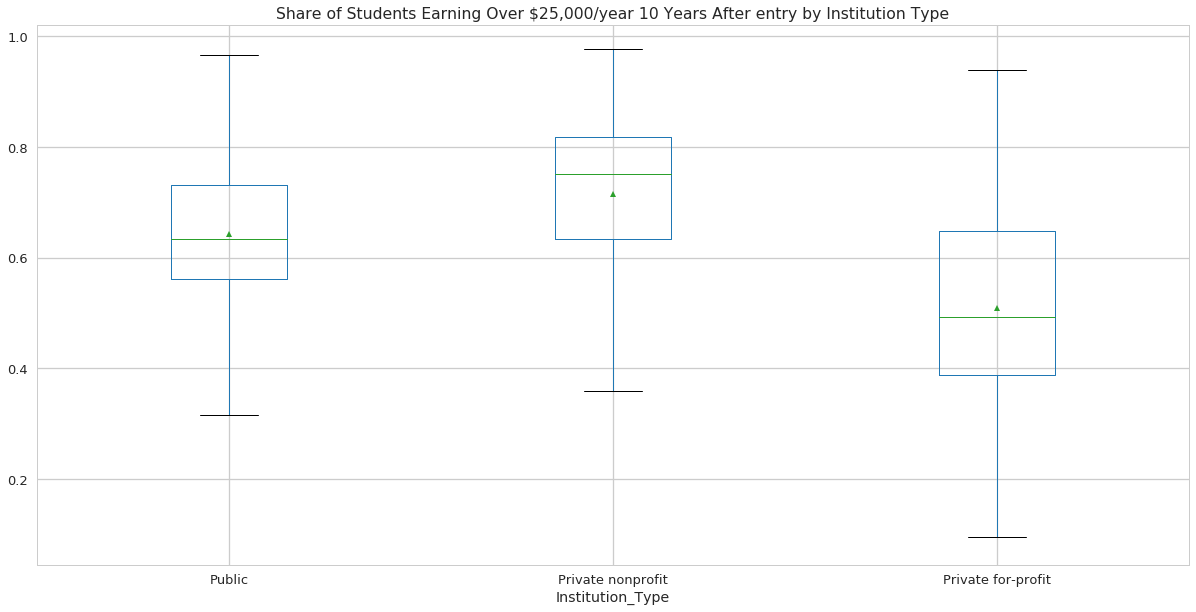

In [95]:
# Create box plot 

df_threshold_earning_box.boxplot(column='GT_25K_P10', by='Institution_Type', showmeans = True, figsize = (20,10))

plt.title("Share of Students Earning Over $25,000/year 10 Years After entry by Institution Type")

plt.suptitle("")

Result Analysis:
------------------
From the result,we found that private non-profit schools have the highest share of students with earnings over \$25,000/yr. For the  private for-profit schools, almost half of the students from these schools have earning less than \$25,000/yr. Students from public schools have an earning potential close to that of the private non-profit schools.

### Query 5: For each award level conferred at the institution, find the maximum, minimum,and average of the mean earning of students working and not enrolled 10 years after entry in lowest income tercile\$0-\$30,000,  middle income tercile \$30,001-\$75,000, and highest income tercile \$75,001+

In [96]:
income_tercile='''
SELECT I.HIGHDEG AS Highest_Award_Level_Conferred, 
              MN_EARN_WNE_INC1_P10 AS "Mean Earning of Students in Lowest Income Tercile(0-30000)",
              MN_EARN_WNE_INC2_P10 AS "Mean Earning of Students in Middle Income Tercile(30001-75000)",
              MN_EARN_WNE_INC3_P10 AS "Mean Earning of Students in Highest Income Tercile(75001+)"
FROM institution I 
INNER JOIN earning E on I.UNITID=E.UNITID
ORDER BY I.HIGHDEG
'''

In [97]:
df_income_tercile=pd.read_sql(income_tercile,con=engine_college_scorecard)
df_income_tercile

,Highest_Award_Level_Conferred,Mean Earning of Students in Lowest Income Tercile(0-30000),Mean Earning of Students in Middle Income Tercile(30001-75000),Mean Earning of Students in Highest Income Tercile(75001+)
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
7,0,NaN,NaN,NaN
8,0,NaN,NaN,NaN
9,0,NaN,NaN,NaN


In [98]:
# Rename categories 

df_income_tercile['Highest_Award_Level_Conferred'] = pd.Categorical(df_income_tercile['Highest_Award_Level_Conferred'],\
                                                                    categories = ['0','1','2','3','4'],ordered = False)

df_income_tercile['Highest_Award_Level_Conferred'].cat.categories = ['Non-degree-granting',\
                                                                     'Certificate degree','Associate degree',\
                                                                    "Bachelor's degree",'Graduate degree']

In [99]:
df_income_tercile

,Highest_Award_Level_Conferred,Mean Earning of Students in Lowest Income Tercile(0-30000),Mean Earning of Students in Middle Income Tercile(30001-75000),Mean Earning of Students in Highest Income Tercile(75001+)
0,Non-degree-granting,NaN,NaN,NaN
1,Non-degree-granting,NaN,NaN,NaN
2,Non-degree-granting,NaN,NaN,NaN
3,Non-degree-granting,NaN,NaN,NaN
4,Non-degree-granting,NaN,NaN,NaN
5,Non-degree-granting,NaN,NaN,NaN
6,Non-degree-granting,NaN,NaN,NaN
7,Non-degree-granting,NaN,NaN,NaN
8,Non-degree-granting,NaN,NaN,NaN
9,Non-degree-granting,NaN,NaN,NaN


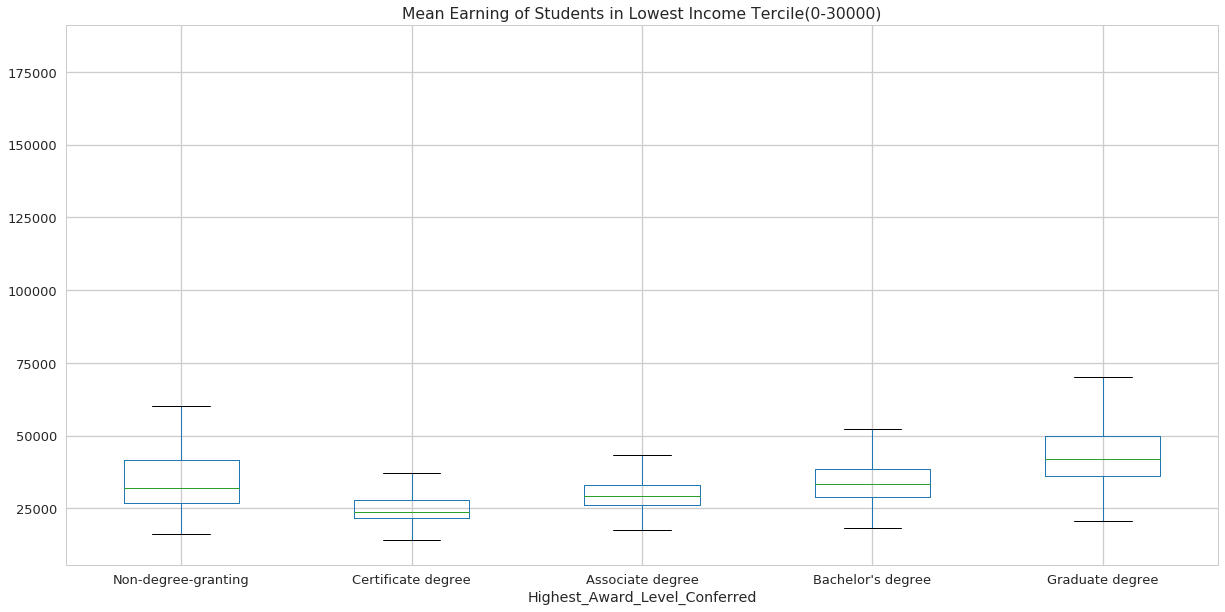

In [100]:
df_income_tercile.boxplot(column = "Mean Earning of Students in Lowest Income Tercile(0-30000)", by = "Highest_Award_Level_Conferred",\
                         figsize = (20,10))
plt.suptitle("")

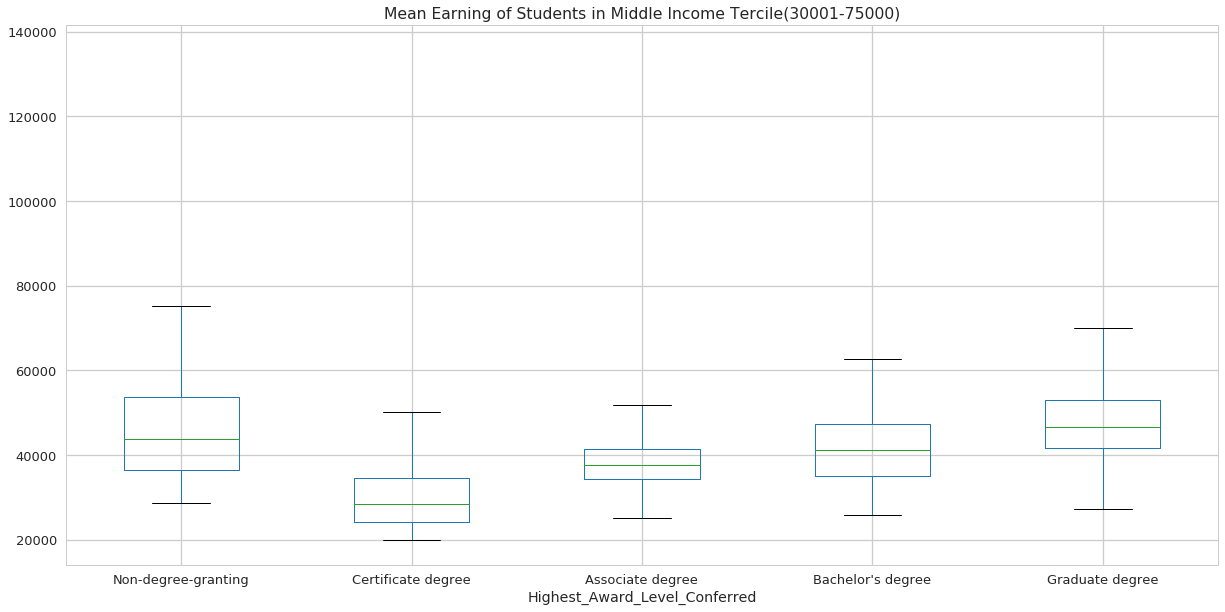

In [101]:
df_income_tercile.boxplot(column = "Mean Earning of Students in Middle Income Tercile(30001-75000)", by = "Highest_Award_Level_Conferred",\
                         figsize = (20,10))

plt.suptitle("")

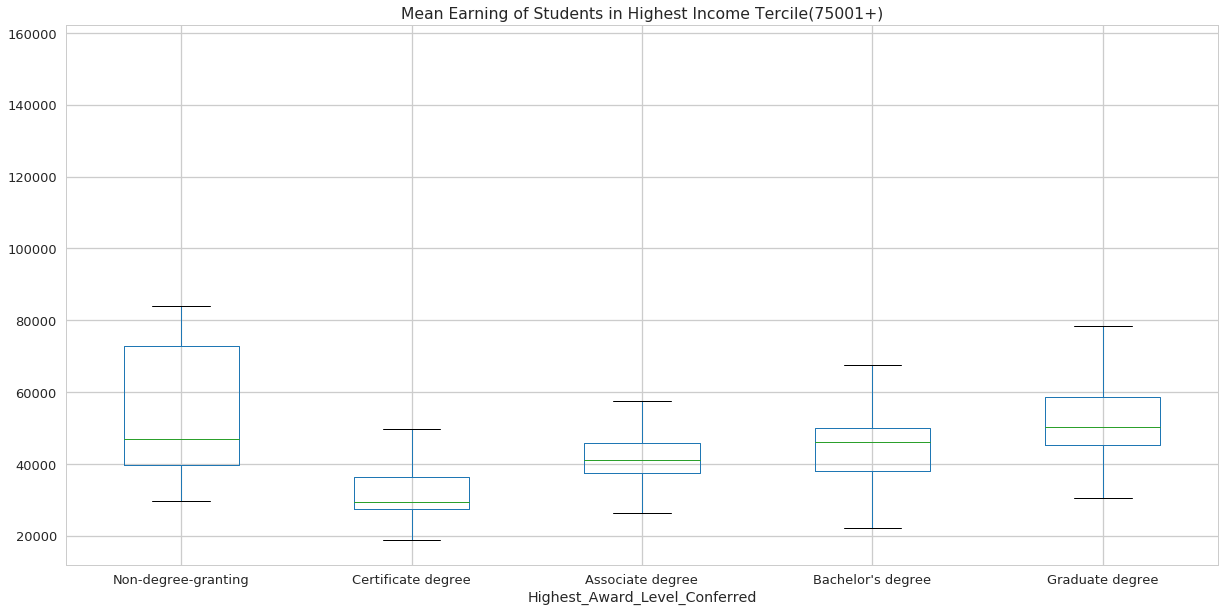

In [102]:
df_income_tercile.boxplot(column = "Mean Earning of Students in Highest Income Tercile(75001+)", by = "Highest_Award_Level_Conferred",\
                         figsize = (20,10))

plt.suptitle("")

Result Analysis:
------------------
Based on the three box plots, we found that students who attended schools that offer graduate degree have the highest mean earnings and students attended schools that only offer certificate degree have the lowest mean earnings. It is surprising to see that students from non-degree-granting institutions have a higher mean earning than those from schools that offer bachelor's degree for all three income groups. 

### Query 6: Relationship between completion rate and cohort default rate

In [103]:
scatter = '''
SELECT R.CDR3 AS "Average_three_year_cohort_default_rate",
       C.C150_4_POOLED AS "Completion_rate_for_four_year_institutions"
FROM repayment R 
INNER JOIN completion C ON C.UNITID = R.UNITID
WHERE R.CDR3 IS NOT NULL AND C150_4_POOLED IS NOT NULL 
ORDER BY R.CDR3;
'''

In [104]:
df_scatter=pd.read_sql(scatter,con=engine_college_scorecard)
df_scatter

,Average_three_year_cohort_default_rate,Completion_rate_for_four_year_institutions
0,0.000,0.5294
1,0.000,0.4615
2,0.000,0.4375
3,0.000,0.6232
4,0.000,0.8648
5,0.000,0.8256
6,0.000,0.8700
7,0.000,1.0000
8,0.000,0.7143
9,0.000,0.6316


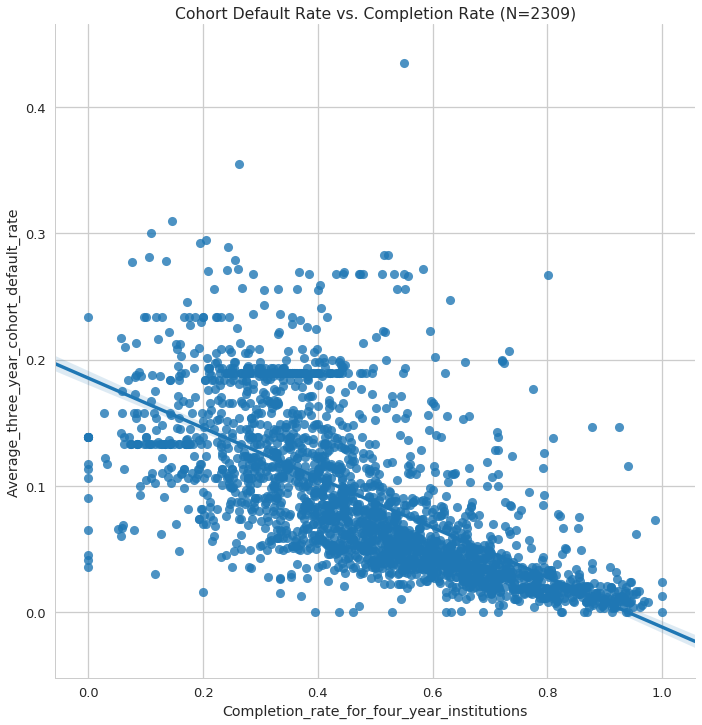

In [106]:
import seaborn as sns

sns.pairplot(df_scatter, x_vars= 'Completion_rate_for_four_year_institutions', y_vars='Average_three_year_cohort_default_rate', size=10, aspect=1, kind='reg')

plt.title('Cohort Default Rate vs. Completion Rate (N=2309)')

In [107]:
### STATSMODELS ###
import statsmodels.formula.api as smf
# create a fitted model
lm = smf.ols(formula='Average_three_year_cohort_default_rate ~ Completion_rate_for_four_year_institutions',\
              data=df_scatter).fit()

# print the coefficients
lm.params

Intercept                                     0.18532
Completion_rate_for_four_year_institutions   -0.19716
dtype: float64

In [108]:
lm.pvalues

Intercept                                      0.000000e+00
Completion_rate_for_four_year_institutions    2.675923e-273
dtype: float64

In [109]:
lm.rsquared

0.4177917925137089

### Result Analysis:

The resulting data frame consists of 2309 observations.
As seen from the scatterplot, a school’s completion rate is negatively associated with its cohort default rate. This is consistent with what we hypothesized since it’s well understood that students who earn degrees are more likely to find employment and repay their student loans. The low p-value confirms that this relationship is statistically significant. 
The coefficients we obtained from this simple linear regression analysis using statsmodels package tell us that an increase of 10 percent in completion rate is associated with a decrease in cohort default rate by around 0.02. However, it may not be easy to predict cohort default rate from completion rate using this linear model as the data is quite noisy and less than 50% of its variability is accounted for as reflected in the r-squared value. 
